In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Descargamos los datos. El resultado es un DataFrame con fechas en el índice y tickers en las columnas.
temp_df = yf.download("^GSPC", period='5y')

# --- PASO DE LIMPIEZA ---
# Nos quedamos solo con las columnas del nivel superior
temp_df.columns = temp_df.columns.get_level_values(0)

C:\Users\adria\AppData\Local\Temp\ipykernel_15788\1426027677.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp_df = yf.download("^GSPC", period='5y')
[*********************100%***********************]  1 of 1 completed


In [21]:
#Calcular rendimientos diarios (el cambio porcentual del precio de cierre de un día para otro)

# Creamos una nueva columna en nuestro DataFrame para almacenar el resultado.
temp_df['returns'] = temp_df['Close'].pct_change()
temp_df

Price,Close,High,Low,Open,Volume,returns
Date,,,,,,
2020-10-26,3400.969971,3441.419922,3364.860107,3441.419922,4002210000,NaN
2020-10-27,3390.679932,3409.510010,3388.709961,3403.149902,3962400000,-0.003026
2020-10-28,3271.030029,3342.479980,3268.889893,3342.479980,5139970000,-0.035288
2020-10-29,3310.110107,3341.050049,3259.820068,3277.169922,4911860000,0.011947
2020-10-30,3269.959961,3304.929932,3233.939941,3293.590088,4843930000,-0.012130
...,...,...,...,...,...,...
2025-10-20,6735.129883,6744.350098,6690.049805,6690.049805,4672170000,0.010672
2025-10-21,6735.350098,6752.160156,6722.029785,6736.750000,5245020000,0.000033
2025-10-22,6699.399902,6741.750000,6655.689941,6741.339844,5710010000,-0.005338


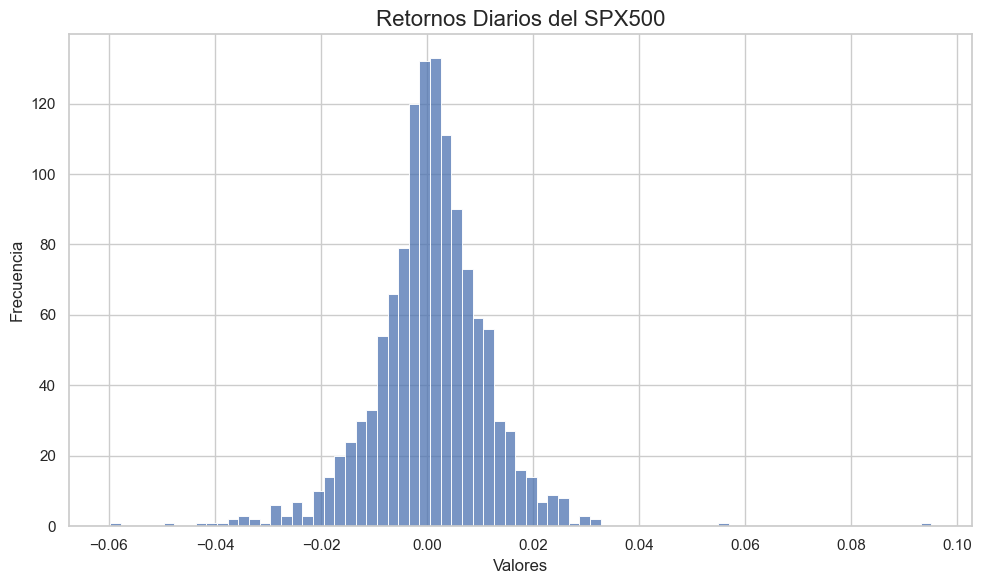

In [23]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

barplot = sns.histplot(x='returns', data=temp_df)

# Usamos Matplotlib para añadir los toques finales y profesionales
plt.title('Retornos Diarios del SPX500', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show() # Muestra el gráfico final

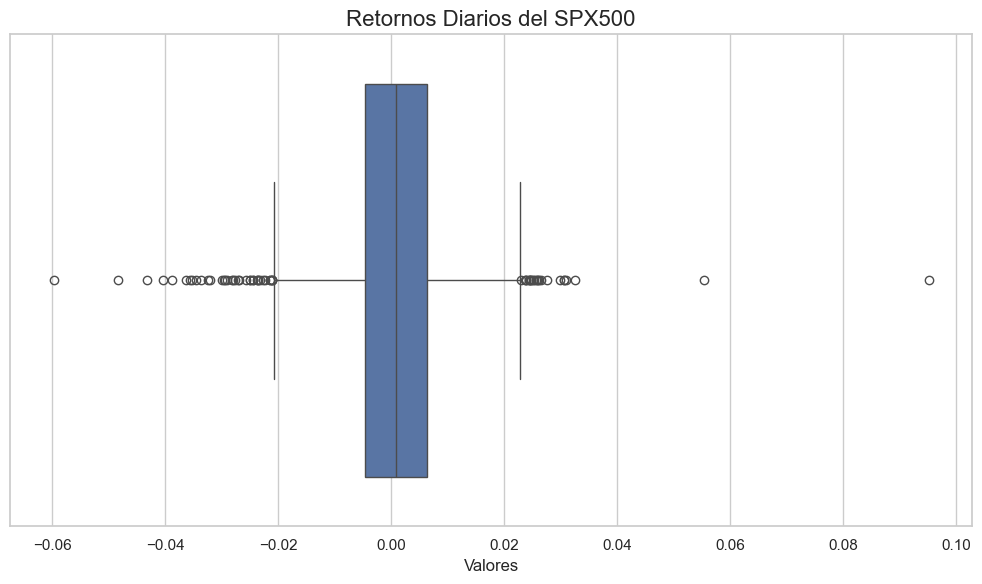

In [26]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

barplot = sns.boxplot(x='returns', data=temp_df)

# Usamos Matplotlib para añadir los toques finales y profesionales
plt.title('Retornos Diarios del SPX500', fontsize=16)
plt.xlabel('Valores', fontsize=12)

plt.tight_layout() # Ajusta el gráfico para que todo encaje bien
plt.show() # Muestra el gráfico final

In [28]:
# Para obtener cuantitativamente la información que vemos en la gráfica, lo ahcemos de la siguiente manera:

Q1 = temp_df['returns'].quantile(0.25)
Q2 = temp_df['returns'].median()
Q3 = temp_df['returns'].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers
outliers = temp_df['returns'][(temp_df['returns'] < lower_bound) | (temp_df['returns'] > upper_bound)]

print(f"Q1 (25%): {Q1}")
print(f"Mediana (Q2): {Q2}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Bigote inferior: {lower_bound}")
print(f"Bigote superior: {upper_bound}")
print(f"Outliers: {list(outliers.values)}")

Q1 (25%): -0.004600578648782161
Mediana (Q2): 0.0008194255259321714
Q3 (75%): 0.006381714014856876
IQR: 0.010982292663639037
Bigote inferior: -0.021074017644240717
Bigote superior: 0.022855153010315432
Outliers: [np.float64(-0.035287878760604796), np.float64(-0.025677883699462), np.float64(-0.02447880752512621), np.float64(0.023790763506800205), np.float64(-0.021449400664502738), np.float64(-0.022724822637582465), np.float64(0.024347646888076113), np.float64(-0.024391082077444004), np.float64(-0.021173138152195015), np.float64(-0.029518158313449172), np.float64(0.02569824789143582), np.float64(-0.027740054250753654), np.float64(-0.028146308431003852), np.float64(0.02474690007293945), np.float64(-0.036284507106413955), np.float64(0.02986242108440229), np.float64(-0.035649708609806985), np.float64(-0.03203710063235676), np.float64(0.02386969542307149), np.float64(-0.04039526078745259), np.float64(0.02474226295510973), np.float64(-0.02379869397635359), np.float64(-0.029110303335524668), n